In [1]:
import glob
import json
import pandas as pd
from collections import Counter
from fuzzywuzzy import fuzz
import plotly.express as px

In [2]:
json_files = glob.glob('../data/google_places_results/results_*.json')

In [3]:
def process_json_file(filename):
    with open(filename) as result_file:
        results_json = json.load(result_file)
        results_json_list = []
        for result_json in results_json:
            for result_json_result in result_json['results']:
                result_json_result['orig_mapped_location'] = result_json['mapped_location']
                result_json_result['orig_address'] = result_json['address']
                results_json_list.append(result_json_result)
        return pd.DataFrame(results_json_list)

In [4]:
#frames is a list of dfs
frames = [process_json_file(file_path) for file_path in json_files]

In [5]:
#combining all the dfs
all_places_results = pd.concat(frames)

In [6]:
all_places_results.head(2)


,business_status,geometry,icon,name,opening_hours,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,orig_mapped_location,orig_address,photos,price_level,permanently_closed
0,OPERATIONAL,"{'location': {'lat': 36.0685457, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Los Paisanos,{'open_now': True},ChIJ7w-yGUFuZIgR7rrQpRfCGgw,"{'compound_code': '3898+CC Nashville, TN, USA'...",4.2,ChIJ7w-yGUFuZIgR7rrQpRfCGgw,GOOGLE,"[night_club, bar, point_of_interest, establish...",6.0,"2045 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch",NaN,NaN,NaN
1,OPERATIONAL,"{'location': {'lat': 36.0684753, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Sun Hair Salon,{'open_now': True},ChIJlfxUC0FuZIgRa8G6Arf-BW8,"{'compound_code': '3898+9C Nashville, TN, USA'...",4.6,ChIJlfxUC0FuZIgRa8G6Arf-BW8,GOOGLE,"[beauty_salon, hair_care, point_of_interest, e...",50.0,"2049 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch","[{'height': 3024, 'html_attributions': ['<a hr...",NaN,NaN


In [7]:
def matcher(column1, column2):
    names_array=[]
    ratio_array=[]    
    if column1 in column2:
        return 100
    else:   
        return fuzz.partial_ratio(column1,column2)

In [8]:
all_places_results['match_ratio'] = all_places_results.apply(
    lambda x: matcher(x['vicinity'].split(',')[0], x['orig_address'].split(',')[0]), axis=1)

In [9]:
all_places_results.head(40)

,business_status,geometry,icon,name,opening_hours,place_id,plus_code,rating,reference,scope,types,user_ratings_total,vicinity,orig_mapped_location,orig_address,photos,price_level,permanently_closed,match_ratio
0,OPERATIONAL,"{'location': {'lat': 36.0685457, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Los Paisanos,{'open_now': True},ChIJ7w-yGUFuZIgR7rrQpRfCGgw,"{'compound_code': '3898+CC Nashville, TN, USA'...",4.2,ChIJ7w-yGUFuZIgR7rrQpRfCGgw,GOOGLE,"[night_club, bar, point_of_interest, establish...",6.0,"2045 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch",NaN,NaN,NaN,100
1,OPERATIONAL,"{'location': {'lat': 36.0684753, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Sun Hair Salon,{'open_now': True},ChIJlfxUC0FuZIgRa8G6Arf-BW8,"{'compound_code': '3898+9C Nashville, TN, USA'...",4.6,ChIJlfxUC0FuZIgRa8G6Arf-BW8,GOOGLE,"[beauty_salon, hair_care, point_of_interest, e...",50.0,"2049 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch","[{'height': 3024, 'html_attributions': ['<a hr...",NaN,NaN,94
2,OPERATIONAL,"{'location': {'lat': 36.0686579, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Solo Style LLC,NaN,ChIJl59cc0FuZIgRkvAljwlcGg0,"{'compound_code': '3898+FF Nashville, TN, USA'...",4.0,ChIJl59cc0FuZIgRkvAljwlcGg0,GOOGLE,"[clothing_store, point_of_interest, store, est...",4.0,"2037 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch",NaN,NaN,NaN,88
3,OPERATIONAL,"{'location': {'lat': 36.0684374, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,Hai Woon Dai,{'open_now': True},ChIJKW-HCUFuZIgR9_z1PBY7088,"{'compound_code': '3898+9C Nashville, TN, USA'...",4.4,ChIJKW-HCUFuZIgR9_z1PBY7088,GOOGLE,"[restaurant, food, point_of_interest, establis...",558.0,"2051 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch","[{'height': 1080, 'html_attributions': ['<a hr...",2.0,NaN,94
4,OPERATIONAL,"{'location': {'lat': 36.0687196, 'lng': -86.68...",https://maps.gstatic.com/mapfiles/place_api/ic...,"Dr. Babajide A. Bamigboye, MD",NaN,ChIJNSKqCEFuZIgRG3Q1eih4goY,"{'compound_code': '3898+F8 Nashville, TN, USA'...",NaN,ChIJNSKqCEFuZIgRG3Q1eih4goY,GOOGLE,"[doctor, health, point_of_interest, establishm...",NaN,"2031 Antioch Pike, Antioch","(36.0685457, -86.6838975)","2045 Antioch Pike, Antioch",NaN,NaN,NaN,88
5,OPERATIONAL,"{'location': {'lat': 36.2114137, 'lng': -86.69...",https://maps.gstatic.com/mapfiles/place_api/ic...,Best Buy Express Kiosk,{'open_now': True},ChIJ3eiSt9BpZIgRbrElosHvXLU,"{'compound_code': '6864+H8 Nashville, TN, USA'...",5.0,ChIJ3eiSt9BpZIgRbrElosHvXLU,GOOGLE,"[point_of_interest, establishment]",4.0,"2800 Opryland Dr, Nashville","(36.211269429469425, -86.6943024067459)","2800 Opryland Dr, Nashville","[{'height': 4048, 'html_attributions': ['<a hr...",NaN,NaN,100
6,OPERATIONAL,"{'location': {'lat': 36.2113706, 'lng': -86.69...",https://maps.gstatic.com/mapfiles/place_api/ic...,Starbucks,{'open_now': True},ChIJ26Qgs-BpZIgR2rs4t_lTCnw,"{'compound_code': '6864+G5 Nashville, TN, USA'...",4.2,ChIJ26Qgs-BpZIgR2rs4t_lTCnw,GOOGLE,"[cafe, food, point_of_interest, store, establi...",11.0,Nashville,"(36.211269429469425, -86.6943024067459)","2800 Opryland Dr, Nashville","[{'height': 4032, 'html_attributions': ['<a hr...",2.0,NaN,11
7,OPERATIONAL,"{'location': {'lat': 36.21144140000001, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,Imaging USA 2018,NaN,ChIJp-SwOtFpZIgRrc_Ve0vGSbo,"{'compound_code': '6864+H6 Nashville, TN, USA'...",4.0,ChIJp-SwOtFpZIgRrc_Ve0vGSbo,GOOGLE,"[lodging, point_of_interest, establishment]",5.0,"Gaylord Opryland Resort & Convention Center, 2...","(36.211269429469425, -86.6943024067459)","2800 Opryland Dr, Nashville","[{'height': 4032, 'html_attributions': ['<a hr...",NaN,NaN,62
8,OPERATIONAL,"{'location': {'lat': 36.21149749999999, 'lng':...",https://maps.gstatic.com/mapfiles/place_api/ic...,fiddler,NaN,ChIJOZ

for addr, grp in all_places_results[all_places_results['match_ratio'] > 93].groupby('orig_address'):
    print(addr)
    print(grp[grp.match_ratio == grp.match_ratio.max()].iloc[0])
    print('='*30)


In [10]:
all_places_results.dtypes

business_status          object
geometry                 object
icon                     object
name                     object
opening_hours            object
place_id                 object
plus_code                object
rating                  float64
reference                object
scope                    object
types                    object
user_ratings_total      float64
vicinity                 object
orig_mapped_location     object
orig_address             object
photos                   object
price_level             float64
permanently_closed       object
match_ratio               int64
dtype: object

In [11]:
types_list = all_places_results['types'].to_list()

In [12]:
types_list

[['night_club', 'bar', 'point_of_interest', 'establishment'],
 ['beauty_salon', 'hair_care', 'point_of_interest', 'establishment'],
 ['clothing_store', 'point_of_interest', 'store', 'establishment'],
 ['restaurant', 'food', 'point_of_interest', 'establishment'],
 ['doctor', 'health', 'point_of_interest', 'establishment'],
 ['point_of_interest', 'establishment'],
 ['cafe', 'food', 'point_of_interest', 'store', 'establishment'],
 ['lodging', 'point_of_interest', 'establishment'],
 ['lodging', 'point_of_interest', 'establishment'],
 ['jewelry_store', 'point_of_interest', 'store', 'establishment'],
 ['convenience_store',
  'cafe',
  'restaurant',
  'food',
  'point_of_interest',
  'store',
  'establishment'],
 ['convenience_store',
  'bakery',
  'cafe',
  'liquor_store',
  'restaurant',
  'food',
  'point_of_interest',
  'store',
  'establishment'],
 ['cafe', 'food', 'point_of_interest', 'establishment'],
 ['point_of_interest', 'store', 'establishment'],
 ['food', 'point_of_interest', 'sto

In [13]:
types_list_flat = [item for sublist in types_list for item in sublist]

In [14]:
types_counts = Counter(types_list_flat)

In [15]:
types_counts_df = pd.DataFrame(list(types_counts.items()),columns = ['type','count']) 

In [16]:
types_counts_df = types_counts_df[types_counts_df['type'] != 'point_of_interest']
types_counts_df = types_counts_df[types_counts_df['type'] != 'establishment']
types_counts_df = types_counts_df[types_counts_df['type'] != 'store']
types_counts_df = types_counts_df[types_counts_df['type'] != 'health']
types_counts_df = types_counts_df[types_counts_df['type'] != 'food']

In [17]:
types_counts_df = types_counts_df.sort_values(by = 'count')

In [18]:
types_counts_df.type.unique()

array(['aquarium', 'city_hall', 'natural_feature', 'hindu_temple',
       'synagogue', 'train_station', 'mosque', 'airport',
       'amusement_park', 'stadium', 'zoo', 'bowling_alley',
       'bicycle_store', 'campground', 'rv_park', 'movie_theater',
       'fire_station', 'courthouse', 'library', 'car_rental',
       'post_office', 'police', 'funeral_home', 'pet_store',
       'department_store', 'museum', 'drugstore', 'art_gallery',
       'book_store', 'locksmith', 'florist', 'secondary_school',
       'painter', 'movie_rental', 'plumber', 'electrician',
       'primary_school', 'veterinary_care', 'hardware_store',
       'roofing_contractor', 'university', 'hospital', 'cemetery',
       'supermarket', 'physiotherapist', 'premise', 'jewelry_store',
       'shopping_mall', 'car_wash', 'travel_agency', 'night_club',
       'bus_station', 'shoe_store', 'spa', 'laundry', 'moving_company',
       'accounting', 'tourist_attraction', 'storage', 'liquor_store',
       'pharmacy', 'bank', 'p

'aquarium', 'city_hall', 'natural_feature', 'hindu_temple',
       'synagogue', 'train_station', 'mosque', 'airport',
       'amusement_park', 'stadium', 'bowling_alley', 'zoo', 'campground',
       'bicycle_store', 'rv_park', 'movie_theater', 'fire_station',
       'courthouse', 'library', 'car_rental', 'post_office', 'police',
       'funeral_home', 'pet_store', 'department_store', 'museum',
       'drugstore', 'art_gallery', 'book_store', 'locksmith', 'florist',
       'secondary_school', 'painter', 'movie_rental', 'plumber',
       'electrician', 'primary_school', 'hardware_store',
       'veterinary_care', 'roofing_contractor', 'university', 'hospital',
       'cemetery', 'supermarket', 'physiotherapist', 'premise',
       'jewelry_store', 'shopping_mall', 'car_wash', 'travel_agency',
       'night_club', 'bus_station', 'shoe_store', 'spa', 'moving_company',
       'laundry', 'accounting', 'tourist_attraction', 'storage',
       'liquor_store', 'pharmacy', 'bank', 'parking', 'meal_delivery',
       'bakery', 'lawyer', 'local_government_office', 'park', 'gym',
       'insurance_agency', 'real_estate_agency', 'car_dealer', 'dentist',
       'furniture_store', 'lodging', 'grocery_or_supermarket', 'cafe',
       'convenience_store', 'school', 'electronics_store', 'gas_station',
       'church', 'beauty_salon', 'clothing_store', 'place_of_worship',
       'meal_takeaway', 'hair_care', 'doctor', 'car_repair', 'bar', 'atm',
       'general_contractor', 'home_goods_store', 'transit_station',
       'finance', 'restaurant', 'health', 'food', 'store'

In [19]:
types_counts_df.head(10)

,type,count
100,aquarium,1
85,city_hall,1
88,natural_feature,1
98,hindu_temple,2
97,synagogue,2
91,train_station,2
76,mosque,3
96,airport,3
87,amusement_park,5
84,stadium,6


In [20]:
types_counts_df.tail(25)

,type,count
71,car_dealer,271
56,dentist,274
29,furniture_store,303
13,lodging,336
46,grocery_or_supermarket,356
12,cafe,360
15,convenience_store,418
54,school,430
50,electronics_store,441
18,gas_station,466


<AxesSubplot:xlabel='type'>

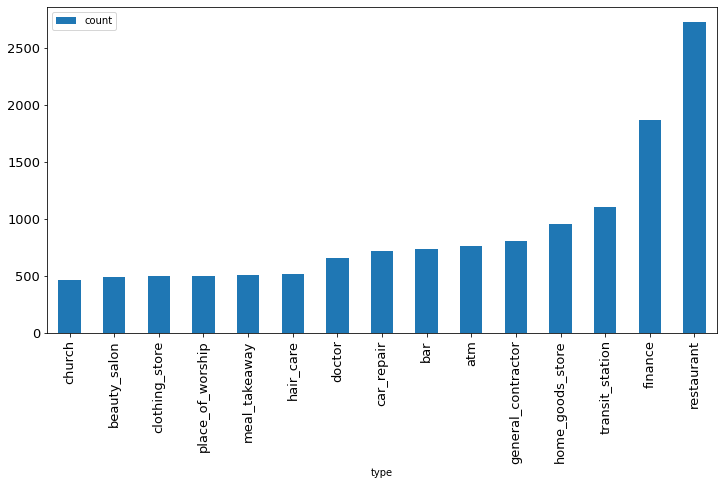

In [21]:
types_counts_df.tail(15).plot(x = 'type', kind = 'bar', fontsize = 13, figsize = (12,6))

In [22]:
Education = ['secondary_school', 'university', 'school', 'primary_school']
Food_Restaurant = ['supermarket','restaurant','meal_delivery', 'grocery_or_supermarket','cafe','meal_takeaway','bakery', 'liquor_store']
Bar_Club = ['night_club', 'bar']
Lodging = ['rv_park', 'lodging']
Health = ['drugstore','veterinary_care', 'hospital', 'physiotherapist', 'doctor', 'pharmacy', 'dentist']

Religious = ['hindu_temple', 'synagogue', 'mosque', 'church', 'place_of_worship']
Construction_or_Services = ['locksmith', 'florist', 'painter', 'plumber', 'electrician', 'roofing_contractor','moving_company','general_contractor', 'insurance_agency','real_estate_agency', 'lawyer', 'laundry', 'storage']
Transportation = ['train_station', 'airport', 'car_rental','bus_station', 'transit_station', 'parking']

Entertainment = ['aquarium', 'amusement_park', 'stadium', 'bowling_alley', 'zoo', 'movie_theater', 'museum', 'art_gallery', 'movie_rental', 'tourist_attraction', 'travel_agency']
Government = ['city_hall', 'fire_station', 'courthouse', 'library', 'post_office', 'police', 'local_government_office']
Store = ['bicycle_store', 'pet_store', 'department_store', 'book_store', 'hardware_store','jewelry_store', 'shopping_mall', 'furniture_store', 'electronics_store', 'clothing_store','shoe_store', 'home_goods_store']
Gas_Station = ['convenience_store', 'gas_station']

Nature = ['natural_feature', 'campground', 'park']
Beauty_Spa = ['spa', 'hair_care', 'beauty_salon']
Bank_Finance = ['accounting', 'bank', 'atm', 'finance']
Funeral = ['funeral_home','cemetery']
Car_Services = ['car_dealer','car_repair','car_wash']
Gym = ['gym']

In [23]:
parent_dict = {'Education':['secondary_school', 'university', 'school', 'primary_school'],
               'Food_Restaurant': ['supermarket','restaurant','meal_delivery', 'grocery_or_supermarket','cafe','meal_takeaway','bakery', 'liquor_store'],
               'Bar_Club': ['night_club', 'bar'],
               'Lodging': ['rv_park', 'lodging'],
               'Health': ['drugstore','veterinary_care', 'hospital', 'physiotherapist', 'doctor', 'pharmacy', 'dentist'],
               'Religious': ['hindu_temple', 'synagogue', 'mosque', 'church', 'place_of_worship'],
               'Construction_or_Services': ['locksmith', 'florist', 'painter', 'plumber', 'electrician', 'roofing_contractor','moving_company','general_contractor', 'insurance_agency','real_estate_agency', 'lawyer', 'laundry', 'storage'],
               'Transportation': ['train_station', 'airport', 'car_rental','bus_station', 'transit_station', 'parking'],
               'Entertainment': ['aquarium', 'amusement_park', 'stadium', 'bowling_alley', 'zoo', 'movie_theater', 'museum', 'art_gallery', 'movie_rental', 'tourist_attraction', 'travel_agency'],
               'Government': ['city_hall', 'fire_station', 'courthouse', 'library', 'post_office', 'police', 'local_government_office'],
               'Store': ['bicycle_store', 'pet_store', 'department_store', 'book_store', 'hardware_store','jewelry_store', 'shopping_mall', 'furniture_store', 'electronics_store', 'clothing_store','shoe_store', 'home_goods_store'],
               'Gas_Station': ['convenience_store', 'gas_station'],
               'Nature': ['natural_feature', 'campground', 'park'],
               'Beauty_Spa': ['spa', 'hair_care', 'beauty_salon'],
               'Bank_Finance': ['accounting', 'bank', 'atm', 'finance'],
               'Funeral': ['funeral_home','cemetery'],
               'Car_Services': ['car_dealer','car_repair','car_wash'],
               'Gym': ['gym']}

In [24]:
types_counts_df['parent_type'] = ''

In [25]:
for index, row in types_counts_df.iterrows():
    for key in parent_dict:
        if row.isin(parent_dict[key]).any():
            types_counts_df['parent_type'][index] = key
    

<ipython-input-25-ee0efb5e7788>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  types_counts_df['parent_type'][index] = key


In [26]:
types_counts_df

,type,count,parent_type
100,aquarium,1,Entertainment
85,city_hall,1,Government
88,natural_feature,1,Nature
98,hindu_temple,2,Religious
97,synagogue,2,Religious
...,...,...,...
21,general_contractor,802,Construction_or_Services
30,home_goods_store,955,Store
19,transit_station,1107,Transportation
26,finance,1869,Bank_Finance


In [32]:
px.treemap(types_counts_df, 
           path=['parent_type','type'], 
           values = 'count',
           color='count', color_continuous_scale='Peach')